# RECOMMENDATION SYSTEM


## Background

E-commerce companies like AMazon , flipkart uses different recommendation systems to provide suggestions to the customers.Amazon uses currently item-item collaberrative filtering, which scales to massive datasets and produces high quality recommendation system in the real time. This system is a kind of a information filtering system which seeks to predict the "rating" or preferences which user is interested in.

## Introduction to Recommendation systems

In this modern world we are overloaded with data and this data provides us the useful information. But it's not possible for the user to extract the information which interest them from these data. In order to help the user to find out information about the product , recommedation systems where developed.

Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.

## What recommeder system can solve ?

It can help the user to find the right product.
It can increase the user engagement. For example, there's 40% more click on the google news due to recommendation.
It helps the item providers to deliver the items to the right user.In Amazon , 35 % products get sold due to recommendation.
It helps to make the contents more personalized.In Netflix most of the rented movies are from recommendations.
Types of recommendations
There are mainly 6 types of the recommendations systems :-

1. **Popularity based systems** :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.

2. **Classification model based**:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is interested or not in the prodcut.

3. **Content based recommedations**:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.

4. **Collaberative Filtering**:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types: a) User-User b) Item -Item

5. **Hybrid Approaches**:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches .

6. **Association rule mining** :- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions.


### Attribute Information:

● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

● timestamp : Time of the rating ( ignore this column for this exercise)

Import Libraries

In [1]:
# Importing important libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [5]:
# Loading the Dataframe

mobile = pd.read_csv('C:/Users/lenovo/Desktop/GitHub Projects/Recommendation Engines/Recommendation-Engine/Files/mobile-reviews & iteam Merged.csv')
mobile

,productId,brand,title,Product_rating,totalReviews,price,originalPrice,name,userId,User_rating,date,verified,title.1,body,helpfulVotes
0,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.00,0.00,Janet,10001,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.00,0.00,Luke Wyatt,10002,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.00,0.00,Brooke,10003,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.00,0.00,amy m. teague,10004,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.00,0.00,tristazbimmer,10005,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,948.00,0.00,jande,50452,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0
67982,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,948.00,0.00,2cool4u,50453,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0
67983,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,948.00,0.00,simon,11236,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN
67984,B081TJFVCJ,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",5.0,1,478.97,0.00,Tobiasz Jedrysiak,55896,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN


In [6]:
#Check the datatypes
mobile.dtypes

productId          object
brand              object
title              object
Product_rating    float64
totalReviews        int64
price             float64
originalPrice     float64
name               object
userId             object
User_rating         int64
date               object
verified             bool
title.1            object
body               object
helpfulVotes      float64
dtype: object

In [7]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productId       67986 non-null  object 
 1   brand           67986 non-null  object 
 2   title           67986 non-null  object 
 3   Product_rating  67986 non-null  float64
 4   totalReviews    67986 non-null  int64  
 5   price           67986 non-null  float64
 6   originalPrice   67986 non-null  float64
 7   name            67984 non-null  object 
 8   userId          67980 non-null  object 
 9   User_rating     67986 non-null  int64  
 10  date            67986 non-null  object 
 11  verified        67986 non-null  bool   
 12  title.1         67972 non-null  object 
 13  body            67965 non-null  object 
 14  helpfulVotes    27215 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(8)
memory usage: 7.3+ MB


In [8]:
#Five point summary for Product_rating oveall mobile dataset

mobile.describe()['Product_rating'].T

count    67986.000000
mean         3.766826
std          0.429197
min          1.000000
25%          3.500000
50%          3.800000
75%          4.100000
max          5.000000
Name: Product_rating, dtype: float64

In [10]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(mobile.Product_rating.min()))
print('Maximum rating is: %d' %(mobile.Product_rating.max()))

Minimum rating is: 1
Maximum rating is: 5


## Handling Missing values

In [11]:
#Check for missing values
print('Number of missing values across columns: \n',mobile.isnull().sum())

Number of missing values across columns: 
 productId             0
brand                 0
title                 0
Product_rating        0
totalReviews          0
price                 0
originalPrice         0
name                  2
userId                6
User_rating           0
date                  0
verified              0
title.1              14
body                 21
helpfulVotes      40771
dtype: int64


## Ratings

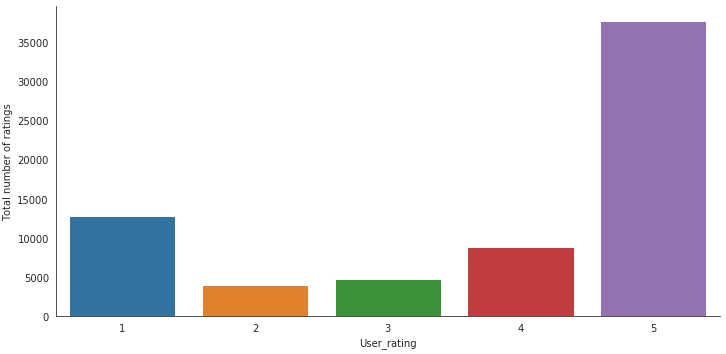

In [13]:
# Check the distribution of the User_rating
with sns.axes_style('white'):
    g = sns.factorplot("User_rating", data=mobile, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

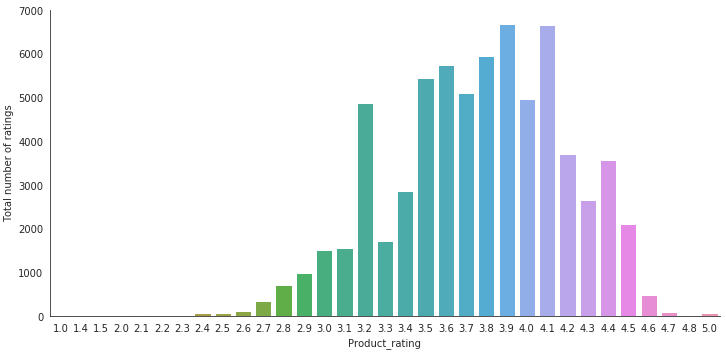

In [14]:
# Check the distribution of the Product_rating
with sns.axes_style('white'):
    g = sns.factorplot("Product_rating", data=mobile, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

## Unique Users and products

In [24]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",mobile.shape[0])
print("Total No of Brands  :", mobile["brand"].nunique())
print("Total No of products   :", mobile["productId"].nunique())
print("Total No of Users   :", mobile["userId"].nunique())

Total data 
--------------------------------------------------

Total no of ratings : 67986
Total No of Brands  : 11
Total No of products   : 720
Total No of Users   : 46386


## Analyzing the rating

In [25]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = mobile.groupby(by='userId')['User_rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

userId
10010      6323
10062       347
10010.0     191
10288       108
13964       107
Name: User_rating, dtype: int64

In [26]:
no_of_rated_products_per_user.describe()

count    46386.000000
mean         1.465528
std         29.485484
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       6323.000000
Name: User_rating, dtype: float64

In [30]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )


 No of rated product more than 50 per user : 16



## 1. Popularity Based Recommendation
Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user you cannot recommend items accordingly.

In [41]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=mobile.groupby("productId").filter(lambda x:x['Product_rating'].count() >=50)
new_df

,productId,brand,title,Product_rating,totalReviews,price,originalPrice,name,userId,User_rating,date,verified,title.1,body,helpfulVotes
126,B002UHS0UI,Motorola,Verizon Wireless Motorola RAZR V3m - Silver,2.7,208,0.0,0.0,Joyful,10122,3,"August 25, 2016",True,Remove previous negative review that was not V...,First of all I need to delete my lst review si...,24.0
127,B002UHS0UI,Motorola,Verizon Wireless Motorola RAZR V3m - Silver,2.7,208,0.0,0.0,Educated Consumer,10123,5,"November 21, 2019",True,"Sound Quality: Impressive, Battery Life: Out O...",I made a three hour international call and it ...,NaN
128,B002UHS0UI,Motorola,Verizon Wireless Motorola RAZR V3m - Silver,2.7,208,0.0,0.0,mike k,10124,1,"May 1, 2019",True,Dont waste your money on this junk!,Horrible purchase. Came today and first thing ...,1.0
129,B002UHS0UI,Motorola,Verizon Wireless Motorola RAZR V3m - Silver,2.7,208,0.0,0.0,Eddie Gamble,10125,1,"September 5, 2018",True,Wouldn't charge after only a month of use.,After only having this phone for a month it wo...,1.0
130,B002UHS0UI,Motorola,Verizon Wireless Motorola RAZR V3m - Silver,2.7,208,0.0,0.0,Andrew,10126,4,"February 14, 2015",True,Great!,The phone arrived with some scratches on the f...,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67979,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,948.0,0.0,Cindy Cowles,50450,3,"July 17, 2019",False,Updated review,Update: If you like sending and receiving pict...,2.0
67980,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,948.0,0.0,Los Kositos,50451,5,"October 7, 2019",False,From iPhone to Android and loving it,I love my new phone. I've been dying to do a r...,1.0
67981,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,948.0,0.0,jande,50452,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0
67982,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,948.0,0.0,2cool4u,50453,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0


Text(0.5, 1.0, '# RATINGS per Product')

Text(0.5, 0, 'Product')

Text(0, 0.5, 'No of ratings per product')

[]

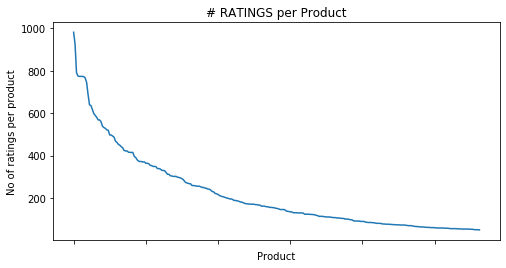

In [43]:
no_of_ratings_per_product = new_df.groupby(by='productId')['Product_rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [47]:
#Average rating of the product 

new_df.groupby('productId')['Product_rating'].mean().head()

productId
B002UHS0UI    2.7
B002WTC1NG    3.6
B0033SFV5A    3.3
B003FCO9XE    2.6
B003P2VNAQ    3.6
Name: Product_rating, dtype: float64

In [49]:
new_df.groupby('productId')['Product_rating'].mean().sort_values(ascending=False).head()

productId
B07K1M36CM    4.6
B07YQ58NPF    4.6
B07YZLRS3Z    4.6
B07YJHXZT6    4.6
B07WW25BSV    4.6
Name: Product_rating, dtype: float64

In [50]:
#Total no of rating for product

new_df.groupby('productId')['Product_rating'].count().sort_values(ascending=False).head()

productId
B00F2SKPIM    981
B00836Y6B2    925
B07FZH9BGV    791
B01D1J9BGU    775
B018OMP8ES    773
Name: Product_rating, dtype: int64

In [54]:
ratings_mean_count = pd.DataFrame(new_df.groupby('productId')['Product_rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('productId')['Product_rating'].count())
ratings_mean_count.head()

,Product_rating,rating_counts
productId,,
B002UHS0UI,2.7,207
B002WTC1NG,3.6,348
B0033SFV5A,3.3,56
B003FCO9XE,2.6,77
B003P2VNAQ,3.6,67


In [55]:
ratings_mean_count['rating_counts'].max()

981

<Figure size 576x432 with 0 Axes>

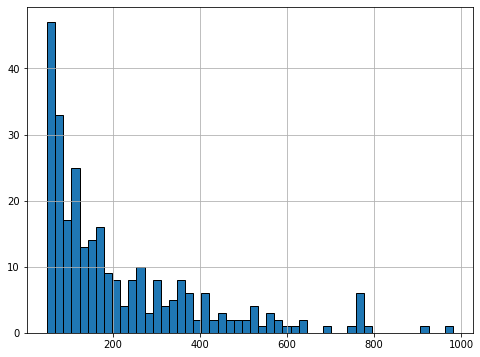

In [56]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

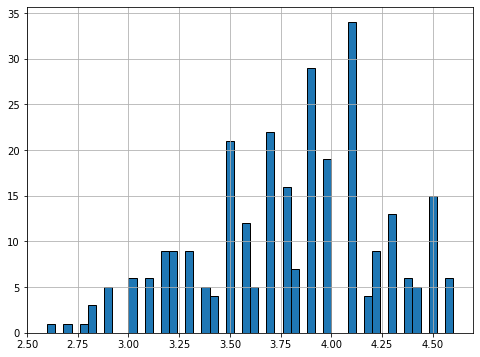

In [57]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Product_rating'].hist(bins=50)


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

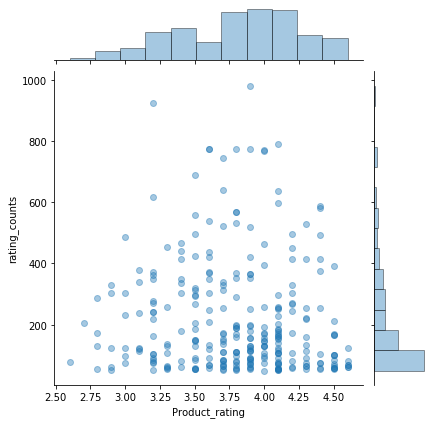

In [58]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Product_rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

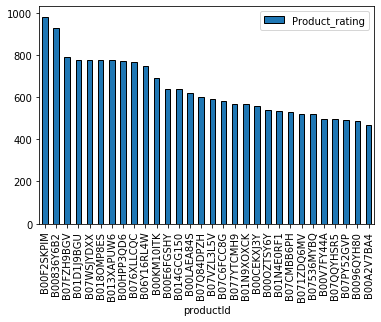

In [59]:
popular_products = pd.DataFrame(new_df.groupby('productId')['Product_rating'].count())
most_popular = popular_products.sort_values('Product_rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

## Collaberative filtering (Item-Item recommedation)

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

https://pypi.org/project/scikit-surprise/